## 1 robert

In [69]:
import numpy as np

def robert(img):
  r, c = img.shape
  new_image = np.zeros((r, c))
  new_imageX = np.zeros((r, c))
  new_imageY = np.zeros((r, c))
  dx = [[-1,0],[0,1]]
  dy = [[0,-1],[1,0]]
  for i in range(r):
    for j in range(c):
      if (j+2<=c) and (i+2<=r):
        new_imageX[i,j] = (np.sum(img[i:i+2, j:j+2] * dx))**2
        new_imageX[i,j] = (np.sum(img[i:i+2, j:j+2] * dy))**2 
        new_image[i,j] = (new_imageX[i, j]*new_imageX[i,j] + new_imageY[i, j]*new_imageY[i,j])**0.5
  return np.uint8(new_image)

# 图像转化成灰度图像
img = cv2.imread('/content/linux-cover.jpeg', cv2.IMREAD_GRAYSCALE)
Roberts = robert(img)

In [70]:
import cv2
def cv_filter(kernel_x, kernel_y, grayImage):
  # 算子
  x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
  y = cv2.filter2D(grayImage, cv2.CV_16S, kernely) 

  # 调用convertScaleAbs()函数计算绝对值，
  # 并将图像转换为8位图进行显示，然后进行图像融合
  absX = cv2.convertScaleAbs(x)
  absY = cv2.convertScaleAbs(y)
  Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
  return Roberts

# 使用 Numpy 构建卷积核，并对灰度图像在 x 和 y 的方向上做一次卷积运算
# Roberts 算子
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)
cv_Roberts = cv_filter(kernelx, kernely, img)

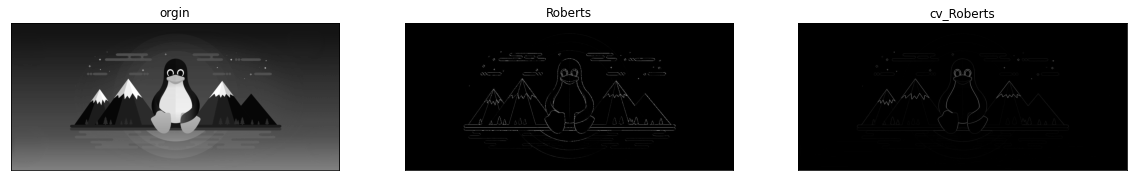

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
def plot(titles, images):
  plt.figure(figsize=(20,20))
  for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
  plt.show()

titles = ['orgin', 'Roberts','cv_Roberts']
images = [img, Roberts,cv_Roberts]
plot(titles, images)

## 2 sobel

In [72]:
def sobel(img):
  r, c = img.shape
  new_image = np.zeros((r, c))
  new_imageX = np.zeros(img.shape)
  new_imageY = np.zeros(img.shape)
  dx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) # X方向
  dy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # Y方向

  for i in range(r-3):
    for j in range(c-3):
      new_imageX[i+1, j+1] = (np.sum(img[i:i+3, j:j+3] * dx))**2 
      new_imageY[i+1, j+1] = (np.sum(img[i:i+3, j:j+3] * dy))**2
      new_image[i+1, j+1] = (new_imageX[i+1, j+1]*new_imageX[i+1,j+1] + new_imageY[i+1, j+1]*new_imageY[i+1,j+1])**0.5
  return np.uint8(new_image)# 无方向算子处理的图像

img = cv2.imread('/content/linux-cover.jpeg', cv2.IMREAD_GRAYSCALE)
Sobel = sobel(img)

In [73]:
# Sobel 算子
x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
# 转 uint8 ,图像融合
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cv_Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

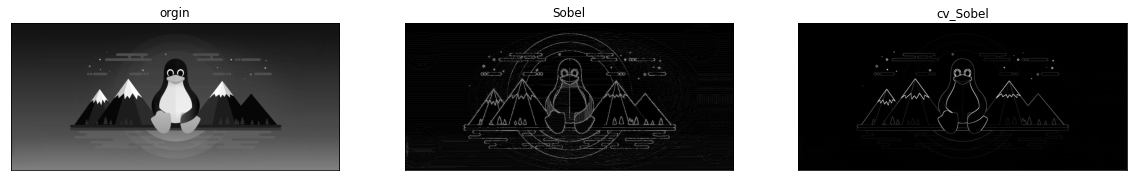

In [74]:
titles = ['orgin', 'Sobel','cv_Sobel']
images = [img, Sobel,cv_Sobel]
plot(titles, images)

## 3 scharr

In [75]:
def scharr(img):
  r, c = img.shape
  new_image = np.zeros((r, c))
  new_imageX = np.zeros(img.shape)
  new_imageY = np.zeros(img.shape)
  dx = np.array([[-3,0,3],[-10,0,10],[-3,0,3]]) # X方向
  dy = np.array([[-3,-10,-3],[0,0,0],[3,10,3]]) # Y方向

  for i in range(r-3):
    for j in range(c-3):
      new_imageX[i+1, j+1] = (np.sum(img[i:i+3, j:j+3] * dx))**2 
      new_imageY[i+1, j+1] = (np.sum(img[i:i+3, j:j+3] * dy))**2 
      new_image[i+1, j+1] = (new_imageX[i+1, j+1]*new_imageX[i+1,j+1] + new_imageY[i+1, j+1]*new_imageY[i+1,j+1])**0.5
  return np.uint8(new_image)# 无方向算子处理的图像

img = cv2.imread('/content/linux-cover.jpeg', cv2.IMREAD_GRAYSCALE)
Scharr = scharr(img)

In [76]:
# Scharr 算子
x = cv2.Scharr(img, cv2.CV_16S, 1, 0) # X 方向
y = cv2.Scharr(img, cv2.CV_16S, 0, 1) # Y 方向
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cv_Scharr = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

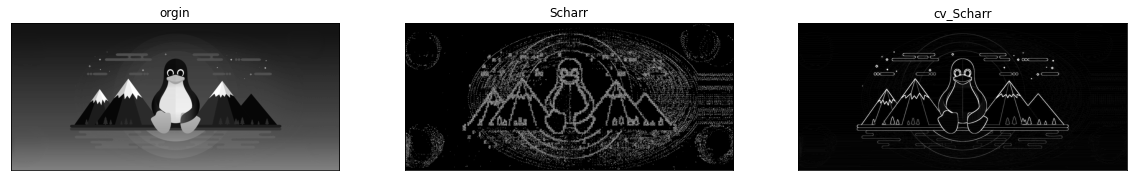

In [77]:
titles = ['orgin', 'Scharr','cv_Scharr']
images = [img, Scharr, cv_Scharr]
plot(titles, images)

## 4 laplace

In [78]:
# 常用的Laplace算子模板 [[0,1,0],[1,-4,1],[0,1,0]] [[1,1,1],[1,-8,1],[1,1,1]]
def laplace(img):
  r, c = img.shape
  new_image = np.zeros((r, c))
  L_sunnzi = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
  # L_sunnzi = np.array([[1,1,1],[1,-8,1],[1,1,1]])

  for i in range(r-3):
    for j in range(c-3):
      new_image[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * L_sunnzi))
  return np.uint8(new_image)

img = cv2.imread('/content/linux-cover.jpeg', cv2.IMREAD_GRAYSCALE)
Laplace = laplace(img)


In [79]:
# Laplacian
dst = cv2.Laplacian(img, cv2.CV_16S, ksize = 3)
cv_Laplace = cv2.convertScaleAbs(dst)

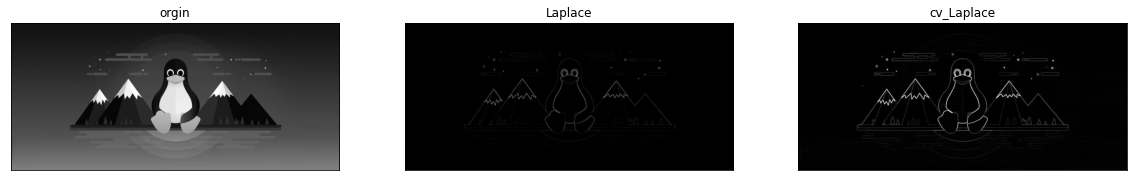

In [80]:
titles = ['orgin', 'Laplace','cv_Laplace']
images = [img, Laplace, cv_Laplace]
plot(titles, images)

## 5 log

In [81]:
def log(img):
  r, c = img.shape
  new_image = np.zeros((r, c))
  dy = np.array([[-2,-4,-4,-4,-2],[-4,0,8,0,-4],[-4,8,24,8,-4],[-4,0,8,0,-4],[-2,-4,-4,-4,-2]])

  for i in range(r-5):
    for j in range(c-5):
      new_image[i+2, j+2] = abs(np.sum(img[i:i+5, j:j+5] * dy))
  return np.uint8(new_image)

img = cv2.imread('/content/linux-cover.jpeg', cv2.IMREAD_GRAYSCALE)
LOG = log(img)

In [82]:
# 先通过高斯滤波降噪
gaussian = cv2.GaussianBlur(img, (3, 3), 0)

# 再通过拉普拉斯算子做边缘检测
dst = cv2.Laplacian(gaussian, cv2.CV_16S, ksize=3)
cv_LOG = cv2.convertScaleAbs(dst)


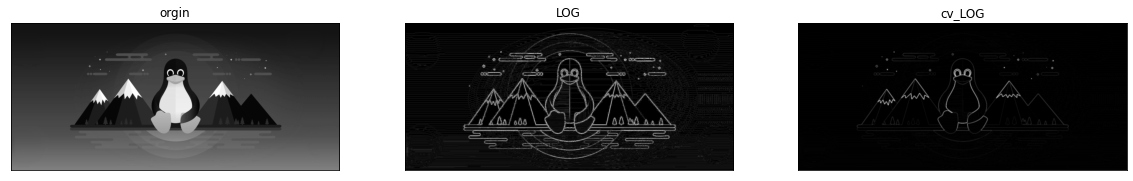

In [83]:
titles = ['orgin', 'LOG','cv_LOG']
images = [img, LOG, cv_LOG]
plot(titles, images)

## 6 prewitt

In [84]:
def prewitt(img):
  r, c = img.shape
  new_image = np.zeros((r, c))
  new_imageX = np.zeros(img.shape)
  new_imageY = np.zeros(img.shape)
  dx = np.array([[0,0,-1],[1,0,-1],[1,0,-1]])
  dy = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
  for i in range(r):
    for j in range(c):
      if (j+3<=c) and (i+3<=r):
        new_imageX[i,j] = (np.sum(img[i:i+3, j:j+3] * dx))**2
        new_imageX[i,j] = (np.sum(img[i:i+3, j:j+3] * dy))**2 
        new_image[i,j] = (new_imageX[i, j]*new_imageX[i,j] + new_imageY[i, j]*new_imageY[i,j])**0.5
  return np.uint8(new_image)

img = cv2.imread('/content/linux-cover.jpeg', cv2.IMREAD_GRAYSCALE)
Prewitt = prewitt(img)

In [85]:
# Prewitt 算子
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
cv_Prewitt = cv_filter(kernelx, kernely, img)

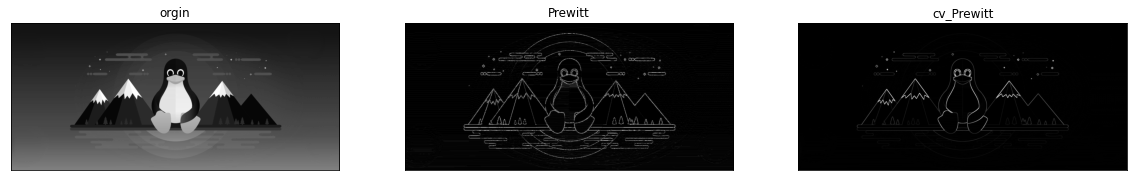

In [86]:
titles = ['orgin', 'Prewitt','cv_Prewitt']
images = [img, Prewitt, cv_Prewitt]
plot(titles, images)

## 7 canny

In [87]:
import math

# 定义高斯算子
sigma1 = sigma2 = 1
sum = 0
gaussian = np.zeros([5, 5])
for i in range(5):
  for j in range(5):
    gaussian[i,j] = math.exp(-1/2 * (np.square(i-3)/np.square(sigma1)           #生成二维高斯分布矩阵
                    + (np.square(j-3)/np.square(sigma2)))) / (2*math.pi*sigma1*sigma2)
    sum = sum + gaussian[i, j]

# step1.高斯滤波
W, H = img.shape
new_img = np.zeros([W-5, H-5])
for i in range(W-5):
  for j in range(H-5):
    new_img[i,j] = np.sum(img[i:i+5,j:j+5]*gaussian)   # 与高斯矩阵卷积实现滤波

# step2.增强 通过求梯度幅值
W1, H1 = new_img.shape
dx = np.zeros([W1-1, H1-1])
dy = np.zeros([W1-1, H1-1])
d = np.zeros([W1-1, H1-1])
for i in range(W1-1):
  for j in range(H1-1):   
    dx[i,j] = new_img[i, j+1] - new_img[i, j]
    dy[i,j] = new_img[i+1, j] - new_img[i, j]        
    d[i,j] = np.sqrt(np.square(dx[i,j]) + np.square(dy[i,j]))   # 图像梯度幅值作为图像强度值

# setp3.非极大值抑制 NMS
W2, H2 = d.shape
NMS = np.copy(d)
NMS[0,:] = NMS[W2-1,:] = NMS[:,0] = NMS[:, H2-1] = 0
for i in range(1, W2-1):
  for j in range(1, H2-1):      
    if d[i, j] == 0:
        NMS[i, j] = 0
    else:
        gradX = dx[i, j]
        gradY = dy[i, j]
        gradTemp = d[i, j]
        
        # 如果Y方向幅度值较大
        if np.abs(gradY) > np.abs(gradX):
            weight = np.abs(gradX) / np.abs(gradY)
            grad2 = d[i-1, j]
            grad4 = d[i+1, j]
            # 如果x,y方向梯度符号相同
            if gradX * gradY > 0:
                grad1 = d[i-1, j-1]
                grad3 = d[i+1, j+1]
            # 如果x,y方向梯度符号相反
            else:
                grad1 = d[i-1, j+1]
                grad3 = d[i+1, j-1]
                
        # 如果X方向幅度值较大
        else:
            weight = np.abs(gradY) / np.abs(gradX)
            grad2 = d[i, j-1]
            grad4 = d[i, j+1]
            # 如果x,y方向梯度符号相同
            if gradX * gradY > 0:
                grad1 = d[i+1, j-1]
                grad3 = d[i-1, j+1]
            # 如果x,y方向梯度符号相反
            else:
                grad1 = d[i-1, j-1]
                grad3 = d[i+1, j+1]
    
        gradTemp1 = weight * grad1 + (1-weight) * grad2
        gradTemp2 = weight * grad3 + (1-weight) * grad4
        if gradTemp >= gradTemp1 and gradTemp >= gradTemp2:
            NMS[i, j] = gradTemp
        else:
            NMS[i, j] = 0

# step4. 双阈值算法检测、连接边缘
W3, H3 = NMS.shape
DT = np.zeros([W3, H3])               
# 定义高低阈值
TL = 0.2 * np.max(NMS)
TH = 0.3 * np.max(NMS)
for i in range(1, W3-1):
    for j in range(1, H3-1):
        if (NMS[i, j] < TL):
            DT[i, j] = 0
        elif (NMS[i, j] > TH):
            DT[i, j] = 1
        elif ((NMS[i-1, j-1:j+1] < TH).any() or (NMS[i+1, j-1:j+1]).any() 
              or (NMS[i, [j-1, j+1]] < TH).any()):
            DT[i, j] = 1


In [88]:
# 高斯滤波
gaussian_blur = cv2.GaussianBlur(img, (3, 3), 0)
cv_Canny = cv2.Canny(gaussian_blur, 100, 200)

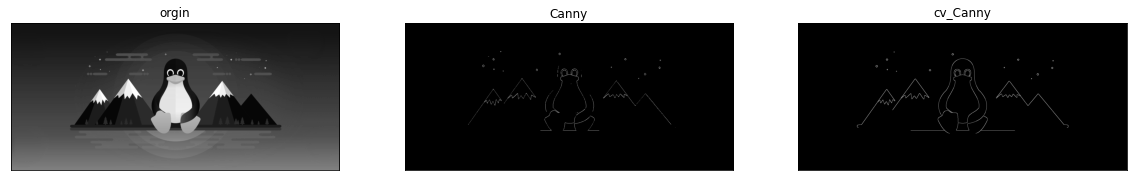

In [89]:
titles = ['orgin', 'Canny','cv_Canny']
images = [img, DT, cv_Canny]
plot(titles, images)